# Intro to Machine Learning Homework 1 

### Bryce Readyhough 
### ID-801005029

## Question 1a

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading in housing data from the provided CSV file

In [2]:
housingData = pd.DataFrame(pd.read_csv('Housing.csv'))
numRows = len(housingData)
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The data above contains several datapoints which are boolean yes or no. For a linear regression line these will need to be converted into numeric 1s or 0s. These can be mapped using an xmap. 

The dataset provided already has the data categorized so each variable does not need to be split.

In [3]:
mapVars = ['mainroad', 'guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea']

def binaryMap(x):
    return x.map({"yes" : 1, "no" : 0})

housingData[mapVars] = housingData[mapVars].apply(binaryMap)

housingData.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


For this model 70% of the data will be used for training, and 30% will be used as test data. The data will be split randomly into 2 sets, the first being the training set containing 70% of the original data, and the second being the test set containing 30% of the original data.

In [4]:
np.random.seed(2)
trainingSet, testSet = train_test_split(housingData, train_size = 0.7, test_size = 0.3, random_state = 
np.random.randint(1), shuffle = 0)

For this model the price of the house will be modeled using the following data types:
- area
- number of bedrooms
- number of bathrooms
- number of stories
- number of parking spaces

The price of the house will be considered the output or dependent variable (Y). The training and test sets are then reduced to only contain these variables.

In [5]:
model1_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
model1_train = trainingSet[model1_vars]
model1_test = testSet[model1_vars]
model1_train_length = len(model1_train)
print(model1_train_length)
model1_test_length = len(model1_test)
print(model1_test_length)
model1_train.head()

381
164


,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


Both the training and testing sets are then converted into 2 Matrices. One containing the X values and one containing the Y values.

In [6]:
model1_X0_train = np.ones((model1_train_length, 1))
model1_X1_train = model1_train.values[:, 0] #area
model1_X2_train = model1_train.values[:, 1] #bedrooms
model1_X3_train = model1_train.values[:, 2] #bathrooms
model1_X4_train = model1_train.values[:, 3] #stories
model1_X5_train = model1_train.values[:, 4] #parking
model1_Y_train = model1_train.values[:, 5] #price

model1_X0_test = np.ones((model1_test_length, 1))
model1_X1_test = model1_test.values[:, 0] #area
model1_X2_test = model1_test.values[:, 1] #bedrooms
model1_X3_test = model1_test.values[:, 2] #bathrooms
model1_X4_test = model1_test.values[:, 3] #stories
model1_X5_test = model1_test.values[:, 4] #parking
model1_Y_test = model1_test.values[:, 5] #price

The X sets are then combined into 5xnumRows matrices. The first column is the X0 place containing only ones.

In [7]:
model1_X1_train_1 = model1_X1_train.reshape((model1_train_length, 1))
model1_X2_train_1 = model1_X2_train.reshape((model1_train_length, 1))
model1_X3_train_1 = model1_X3_train.reshape((model1_train_length, 1))
model1_X4_train_1 = model1_X4_train.reshape((model1_train_length, 1))
model1_X5_train_1 = model1_X5_train.reshape((model1_train_length, 1))

model1_X1_test_1 = model1_X1_test.reshape((model1_test_length, 1))
model1_X2_test_1 = model1_X2_test.reshape((model1_test_length, 1))
model1_X3_test_1 = model1_X3_test.reshape((model1_test_length, 1))
model1_X4_test_1 = model1_X4_test.reshape((model1_test_length, 1))
model1_X5_test_1 = model1_X5_test.reshape((model1_test_length, 1))

model1_X_train = np.hstack((model1_X0_train, model1_X1_train_1, model1_X2_train_1, model1_X3_train_1, model1_X4_train_1, model1_X5_train_1))
model1_X_test = np.hstack((model1_X0_test, model1_X1_test_1, model1_X2_test_1, model1_X3_test_1, model1_X4_test_1, model1_X5_test_1))

print(model1_X_train[:5])
print(model1_X_test[:5])

[[1.000e+00 4.500e+03 3.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 3.990e+03 3.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 4.320e+03 3.000e+00 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 1.905e+03 5.000e+00 1.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 3.510e+03 3.000e+00 1.000e+00 3.000e+00 0.000e+00]]
[[1.00e+00 4.00e+03 3.00e+00 1.00e+00 2.00e+00 1.00e+00]
 [1.00e+00 9.62e+03 3.00e+00 1.00e+00 1.00e+00 2.00e+00]
 [1.00e+00 3.46e+03 4.00e+00 1.00e+00 2.00e+00 0.00e+00]
 [1.00e+00 1.32e+04 2.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 3.66e+03 4.00e+00 1.00e+00 2.00e+00 0.00e+00]]


The first question doesn't require standardization or normalization. Defining basic cost and gradient descent functions:

In [8]:
def compute_cost(XVals, YVals, theta):
    numSamples = len(XVals)
    predictions = XVals.dot(theta) #Makes a prediction using the given values of they using 
                                   #the following equation: prediction = theta0 + theta1*X
    errors = np.subtract(predictions, YVals) #calculates the error from the prediction to the actual Y value
    sqrErrors = np.square(errors) #squaring the errors to make finding the minimum easier
    J = (1/(2 * numSamples)) * np.sum(sqrErrors)
    return J
def gradient_descent(training_XVals, training_YVals, testing_XVals, testing_YVals, theta, alpha, iterations):
    numSamples = len(training_XVals)
    training_loss_history = np.zeros(iterations) #stores the calculated cost for each iteration of the algorithm
    testing_loss_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = training_XVals.dot(theta) #tests the current theta value with each independent variable value
        errors = np.subtract(predictions, training_YVals)
        sum_delta = (alpha/numSamples) * (training_XVals.transpose().dot(errors));
        theta = theta - sum_delta; #updating the value of theta based on the new data
        training_loss_history[i] = compute_cost(training_XVals, training_YVals, theta) #logging the training cost to the cost history log
        testing_loss_history[i] = compute_cost(testing_XVals, testing_YVals, theta)
    return theta, training_loss_history, testing_loss_history

Defining the number of iterations and the alpha that will be used and creating memory for apha.

In [9]:
model1_theta = np.zeros(6)
model1_alpha = 0.0000000001
model1_iterations = 1000

In [10]:
model1_initial_training_cost = compute_cost(model1_X_train, model1_Y_train, model1_theta)
print(model1_initial_training_cost)

13118565517688.451


In [11]:
model1_theta, model1_cost_history, model1_testLoss_history = gradient_descent(model1_X_train, model1_Y_train, model1_X_test, model1_Y_test, model1_theta, model1_alpha, model1_iterations)
print(model1_cost_history[:5])
model1_final_training_cost = compute_cost(model1_X_train, model1_Y_train, model1_theta)
print('Model 1 Final Training Set Cost: ', model1_final_training_cost)

[1.30508916e+13 1.29836171e+13 1.29167396e+13 1.28502568e+13
 1.27841664e+13]
Model 1 Final Training Set Cost:  1682418252640.2073


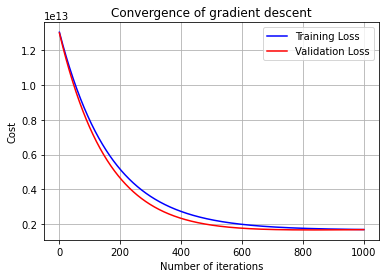

In [12]:
plt.plot(range(1, model1_iterations + 1), model1_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model1_iterations + 1), model1_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

## Question 1b

For the second question the same data will be used. The data will not be not be standardized. This time the following datapoints will be used for the model:
- Area
- Bedrooms
- Bathrooms
- Stories
- Mainroad 
- Guestroom
- Basement
- Hotwaterheating
- Airconditioning
- Parking
- Prefarea

In [13]:
model2_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
model2_train = trainingSet[model2_vars]
model2_test = testSet[model2_vars]
model2_train_length = len(model2_train)
print(model2_train_length)
model2_test_length = len(model2_test)
print(model2_test_length)
model2_train.head()

381
164


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
454,3143000,4500,3,1,2,1,0,0,0,1,0,0
392,3500000,3990,3,1,2,1,0,0,0,0,0,0
231,4690000,4320,3,1,1,1,0,0,0,0,0,1
271,4340000,1905,5,1,2,0,0,1,0,0,0,0
250,4515000,3510,3,1,3,1,0,0,0,0,0,0


In [14]:
model2_Y_train = model2_train.values[:, 0] #price

model2_X0_train = np.ones((model2_train_length, 1))
model2_X1_train = model2_train.values[:, 1] #area
model2_X2_train = model2_train.values[:, 2] #bedrooms
model2_X3_train = model2_train.values[:, 3] #bathrooms
model2_X4_train = model2_train.values[:, 4] #stories
model2_X5_train = model2_train.values[:, 5] #mainroad
model2_X6_train = model2_train.values[:, 6] #guestroom
model2_X7_train = model2_train.values[:, 7] #basement
model2_X8_train = model2_train.values[:, 8] #hotwaterheating
model2_X9_train = model2_train.values[:, 9] #airconditioning
model2_X10_train = model2_train.values[:, 10] #parking
model2_X11_train = model2_train.values[:, 11] #prefarea

model2_Y_test = model2_test.values[:, 5] #price


model2_X0_test = np.ones((model2_test_length, 1))
model2_X1_test = model2_test.values[:, 1] #area
model2_X2_test = model2_test.values[:, 2] #bedrooms
model2_X3_test = model2_test.values[:, 3] #bathrooms
model2_X4_test = model2_test.values[:, 4] #stories
model2_X5_test = model2_test.values[:, 5] #mainroad
model2_X6_test = model2_test.values[:, 6] #guestroom
model2_X7_test = model2_test.values[:, 7] #basement
model2_X8_test = model2_test.values[:, 8] #hotwaterheating
model2_X9_test = model2_test.values[:, 9] #airconditioning
model2_X10_test = model2_test.values[:, 10] #parking
model2_X11_test = model2_test.values[:, 11] #prefarea

In [15]:
model2_X1_train_1 = model2_X1_train.reshape((model2_train_length, 1))
model2_X2_train_1 = model2_X2_train.reshape((model2_train_length, 1))
model2_X3_train_1 = model2_X3_train.reshape((model2_train_length, 1))
model2_X4_train_1 = model2_X4_train.reshape((model2_train_length, 1))
model2_X5_train_1 = model2_X5_train.reshape((model2_train_length, 1))
model2_X6_train_1 = model2_X6_train.reshape((model2_train_length, 1))
model2_X7_train_1 = model2_X7_train.reshape((model2_train_length, 1))
model2_X8_train_1 = model2_X8_train.reshape((model2_train_length, 1))
model2_X9_train_1 = model2_X9_train.reshape((model2_train_length, 1))
model2_X10_train_1 = model2_X10_train.reshape((model2_train_length, 1))
model2_X11_train_1 = model2_X11_train.reshape((model2_train_length, 1))

model2_X1_test_1 = model2_X1_test.reshape((model2_test_length, 1))
model2_X2_test_1 = model2_X2_test.reshape((model2_test_length, 1))
model2_X3_test_1 = model2_X3_test.reshape((model2_test_length, 1))
model2_X4_test_1 = model2_X4_test.reshape((model2_test_length, 1))
model2_X5_test_1 = model2_X5_test.reshape((model2_test_length, 1))
model2_X6_test_1 = model2_X6_test.reshape((model2_test_length, 1))
model2_X7_test_1 = model2_X7_test.reshape((model2_test_length, 1))
model2_X8_test_1 = model2_X8_test.reshape((model2_test_length, 1))
model2_X9_test_1 = model2_X9_test.reshape((model2_test_length, 1))
model2_X10_test_1 = model2_X10_test.reshape((model2_test_length, 1))
model2_X11_test_1 = model2_X11_test.reshape((model2_test_length, 1))

model2_X_train = np.hstack((model2_X0_train, model2_X1_train_1, model2_X2_train_1, model2_X3_train_1, model2_X4_train_1, model2_X5_train_1, model2_X6_train_1, model2_X7_train_1, model2_X8_train_1, model2_X9_train_1, model2_X10_train_1, model2_X11_train_1))
model2_X_test = np.hstack((model2_X0_test, model2_X1_test_1, model2_X2_test_1, model2_X3_test_1, model2_X4_test_1, model2_X5_test_1, model2_X6_test_1, model2_X7_test_1, model2_X8_test_1, model2_X9_test_1, model2_X10_test_1, model2_X11_test_1))

print(model2_X_train[:5])
print(model2_X_test[:5])

[[1.000e+00 4.500e+03 3.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.990e+03 3.000e+00 1.000e+00 2.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 4.320e+03 3.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 1.905e+03 5.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.510e+03 3.000e+00 1.000e+00 3.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[1.00e+00 4.00e+03 3.00e+00 1.00e+00 2.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 9.62e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00 0.00e+00 1.00e+00
  0.00e+00 0.00e+00 2.00e+00 1.00e+00]
 [1.00e+00 3.46e+03 4.00e+00 1.00e+00 2.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 1.32e+04 2.00e+00 1.00e+

In [16]:
model2_theta = np.zeros(12)
model2_alpha = 0.0000000001
model2_iterations = 1000

In [17]:
model2_initial_training_cost = compute_cost(model2_X_train, model2_Y_train, model2_theta)
print(model2_initial_training_cost)

13118565517688.451


In [18]:
model2_theta, model2_cost_history, model2_testLoss_history = gradient_descent(model2_X_train, model2_Y_train, model2_X_test, model2_Y_test, model2_theta, model2_alpha, model2_iterations)
print(model2_cost_history[:5])
model2_final_training_cost = compute_cost(model2_X_train, model2_Y_train, model2_theta)
print('Model 2 Final Training Set Cost: ', model2_final_training_cost)

[1.30508916e+13 1.29836171e+13 1.29167396e+13 1.28502568e+13
 1.27841664e+13]
Model 2 Final Training Set Cost:  1682418141241.2002


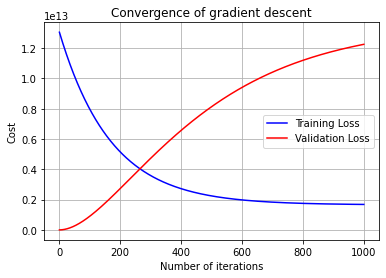

In [19]:
plt.plot(range(1, model2_iterations + 1), model2_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model2_iterations + 1), model2_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

## Question 2a
For question 2a the same model as 1a will be used. However, this time input normalization and standarization will be applied seperatly to the input datasets. Both the training and testing sets will receive the same input normalization and standardization.

To start with the dataset used for question 1a is copied into 2 matrices. One that will be normalized and one that will be standardized.

Note: The matrix being copied contains all X values as well as Y in one variable.

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

model3_vars = model1_vars

model3_stand_train = model1_train
print(model3_stand_train[:5])
model3_norm_train = model1_train

model3_stand_test = model1_test
model3_norm_test = model1_test

model3_trainLength = len(model3_stand_train)
print(model3_trainLength)
model3_testLength = len(model3_stand_test)
print(model3_testLength)

     area  bedrooms  bathrooms  stories  parking    price
454  4500         3          1        2        0  3143000
392  3990         3          1        2        0  3500000
231  4320         3          1        1        0  4690000
271  1905         5          1        2        0  4340000
250  3510         3          1        3        0  4515000
381
164


### Normalization
The data was first normalized using MinMax Normalization. Using this technique the data is scaled so all values fall within 0 and 1.

In [21]:
scaler = MinMaxScaler()
model3_norm_train[model3_vars] = scaler.fit_transform(model3_norm_train[model3_vars])
print(model3_norm_train.head(10))

model3_norm_test[model3_vars] = scaler.fit_transform(model3_norm_test[model3_vars])

print(model3_norm_test.head(10))
print(scaler.transform([[2473, 4, 3.5, 2, 2, 300000]]))
print(scaler.inverse_transform([[1, 1, 1, 1, 1, 0.926893299]]))

         area  bedrooms  bathrooms   stories   parking     price
454  0.193548      0.50        0.0  0.333333  0.000000  0.120606
392  0.156495      0.50        0.0  0.333333  0.000000  0.151515
231  0.180471      0.50        0.0  0.000000  0.000000  0.254545
271  0.005013      1.00        0.0  0.333333  0.000000  0.224242
250  0.121622      0.50        0.0  0.666667  0.000000  0.239394
541  0.040976      0.50        0.0  0.000000  0.000000  0.001485
461  0.226969      0.25        0.0  0.000000  0.000000  0.115152
124  0.340671      0.50        0.5  1.000000  0.333333  0.363636
154  0.131793      0.50        0.5  0.333333  0.666667  0.327273
451  0.357018      0.25        0.0  0.000000  0.000000  0.121212
         area  bedrooms  bathrooms   stories   parking     price
239  0.161512       0.4   0.000000  0.333333  0.333333  0.270000
113  0.547766       0.4   0.000000  0.000000  0.666667  0.412667
325  0.124399       0.6   0.000000  0.333333  0.000000  0.215000
66   0.793814       0.2  

As with questions 1a and 1b the data is then split and stripped down to only the values.

In [22]:
model3_norm_X0_train = np.ones((model3_trainLength, 1))
model3_norm_X1_train = model3_norm_train.values[:, 0] #area
model3_norm_X2_train = model3_norm_train.values[:, 1] #bedrooms
model3_norm_X3_train = model3_norm_train.values[:, 2] #bathrooms
model3_norm_X4_train = model3_norm_train.values[:, 3] #stories
model3_norm_X5_train = model3_norm_train.values[:, 4] #parking
model3_norm_Y_train = model3_norm_train.values[:, 5] #price

model3_norm_X0_test = np.ones((model3_testLength, 1))
model3_norm_X1_test = model3_norm_test.values[:, 0] #area
model3_norm_X2_test = model3_norm_test.values[:, 1] #bedrooms
model3_norm_X3_test = model3_norm_test.values[:, 2] #bathrooms
model3_norm_X4_test = model3_norm_test.values[:, 3] #stories
model3_norm_X5_test = model3_norm_test.values[:, 4] #parking
model3_norm_Y_test = model3_norm_test.values[:, 5] #price

model3_norm_X1_train_1 = model3_norm_X1_train.reshape((model3_trainLength, 1))
model3_norm_X2_train_1 = model3_norm_X2_train.reshape((model3_trainLength, 1))
model3_norm_X3_train_1 = model3_norm_X3_train.reshape((model3_trainLength, 1))
model3_norm_X4_train_1 = model3_norm_X4_train.reshape((model3_trainLength, 1))
model3_norm_X5_train_1 = model3_norm_X5_train.reshape((model3_trainLength, 1))

model3_norm_X1_test_1 = model3_norm_X1_test.reshape((model3_testLength, 1))
model3_norm_X2_test_1 = model3_norm_X2_test.reshape((model3_testLength, 1))
model3_norm_X3_test_1 = model3_norm_X3_test.reshape((model3_testLength, 1))
model3_norm_X4_test_1 = model3_norm_X4_test.reshape((model3_testLength, 1))
model3_norm_X5_test_1 = model3_norm_X5_test.reshape((model3_testLength, 1))

model3_norm_X_train = np.hstack((model3_norm_X0_train, model3_norm_X1_train_1, model3_norm_X2_train_1, model3_norm_X3_train_1, model3_norm_X4_train_1, model3_norm_X5_train_1))
model3_norm_X_test = np.hstack((model3_norm_X0_test, model3_norm_X1_test_1, model3_norm_X2_test_1, model3_norm_X3_test_1, model3_norm_X4_test_1, model3_norm_X5_test_1))

print(model3_norm_X_train[:5])
print(model3_norm_X_test[:5])

[[1.         0.19354839 0.5        0.         0.33333333 0.        ]
 [1.         0.1564952  0.5        0.         0.33333333 0.        ]
 [1.         0.18047079 0.5        0.         0.         0.        ]
 [1.         0.00501308 1.         0.         0.33333333 0.        ]
 [1.         0.12162162 0.5        0.         0.66666667 0.        ]]
[[1.         0.16151203 0.4        0.         0.33333333 0.33333333]
 [1.         0.54776632 0.4        0.         0.         0.66666667]
 [1.         0.12439863 0.6        0.         0.33333333 0.        ]
 [1.         0.79381443 0.2        0.         0.         0.33333333]
 [1.         0.13814433 0.6        0.         0.33333333 0.        ]]


The data was then run through the gradient descent algorithm exactly the same was as in 1a

In [23]:
model3_norm_theta = np.zeros(6)
model3_norm_alpha = 0.01
model3_norm_iterations = 200

model3_norm_initial_training_cost = compute_cost(model3_norm_X_train, model3_norm_Y_train, model3_norm_theta)
print(model3_norm_initial_training_cost)

model3_norm_theta, model3_norm_cost_history, model3_norm_testLoss_history = gradient_descent(model3_norm_X_train, model3_norm_Y_train, model3_norm_X_test, model3_norm_Y_test, model3_norm_theta, model3_norm_alpha, model3_norm_iterations)
print(model3_norm_cost_history[:5])
model3_norm_final_training_cost = compute_cost(model3_norm_X_train, model3_norm_Y_train, model3_norm_theta)
print('Model 1 Final Training Set Cost: ', model3_norm_final_training_cost)
print('Final theta = ', model3_norm_theta)

0.04726753099662817
[0.0461728  0.0451099  0.0440779  0.04307589 0.042103  ]
Model 1 Final Training Set Cost:  0.009228390540192841
Final theta =  [0.15724769 0.05680007 0.09040642 0.05119613 0.06876144 0.06157817]


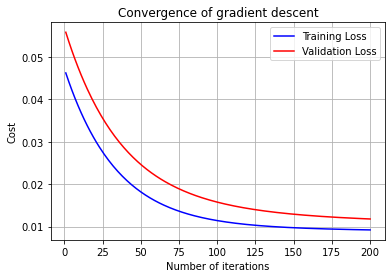

In [24]:
plt.plot(range(1, model3_norm_iterations + 1), model3_norm_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model3_norm_iterations + 1), model3_norm_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

### Standardization
The data was then Standardized. The goal with standardization is to scale the data to achieve a mean of zero

In [25]:
scaler = StandardScaler()
model3_stand_train[model3_vars] = scaler.fit_transform(model3_stand_train[model3_vars])
print(model3_stand_train.head(10))

model3_stand_test[model3_vars] = scaler.fit_transform(model3_stand_test[model3_vars])
print(model3_stand_test.head(10))

         area  bedrooms  bathrooms   stories   parking     price
454 -0.286366  0.073764  -0.581230  0.207401 -0.822960 -0.868394
392 -0.544762  0.073764  -0.581230  0.207401 -0.822960 -0.677628
231 -0.377564  0.073764  -0.581230 -0.937813 -0.822960 -0.041744
271 -1.601145  2.884176  -0.581230  0.207401 -0.822960 -0.228768
250 -0.787958  0.073764  -0.581230  1.352614 -0.822960 -0.135256
541 -1.350349  0.073764  -0.581230 -0.937813 -0.822960 -1.603589
461 -0.053303 -1.331442  -0.581230 -0.937813 -0.822960 -0.902058
124  0.739618  0.073764   1.488383  2.497828  0.321375  0.631546
154 -0.717026  0.073764   1.488383  0.207401  1.465710  0.407116
451  0.853616 -1.331442  -0.581230 -0.937813 -0.822960 -0.864653
         area  bedrooms  bathrooms   stories   parking     price
239 -0.528409 -0.007694  -0.550215  0.265241  0.442615 -0.095841
113  1.673306 -0.007694  -0.550215 -0.910424  1.652428  0.708470
325 -0.739961  1.254180  -0.550215  0.265241 -0.767199 -0.405914
66   3.075822 -1.269569  

In [26]:
model3_stand_X0_train = np.ones((model3_trainLength, 1))
model3_stand_X1_train = model3_stand_train.values[:, 0] #area
model3_stand_X2_train = model3_stand_train.values[:, 1] #bedrooms
model3_stand_X3_train = model3_stand_train.values[:, 2] #bathrooms
model3_stand_X4_train = model3_stand_train.values[:, 3] #stories
model3_stand_X5_train = model3_stand_train.values[:, 4] #parking
model3_stand_Y_train = model3_stand_train.values[:, 5] #price

model3_stand_X0_test = np.ones((model3_testLength, 1))
model3_stand_X1_test = model3_stand_test.values[:, 0] #area
model3_stand_X2_test = model3_stand_test.values[:, 1] #bedrooms
model3_stand_X3_test = model3_stand_test.values[:, 2] #bathrooms
model3_stand_X4_test = model3_stand_test.values[:, 3] #stories
model3_stand_X5_test = model3_stand_test.values[:, 4] #parking
model3_stand_Y_test = model3_stand_test.values[:, 5] #price

model3_stand_X1_train_1 = model3_stand_X1_train.reshape((model3_trainLength, 1))
model3_stand_X2_train_1 = model3_stand_X2_train.reshape((model3_trainLength, 1))
model3_stand_X3_train_1 = model3_stand_X3_train.reshape((model3_trainLength, 1))
model3_stand_X4_train_1 = model3_stand_X4_train.reshape((model3_trainLength, 1))
model3_stand_X5_train_1 = model3_stand_X5_train.reshape((model3_trainLength, 1))

model3_stand_X1_test_1 = model3_stand_X1_test.reshape((model3_testLength, 1))
model3_stand_X2_test_1 = model3_stand_X2_test.reshape((model3_testLength, 1))
model3_stand_X3_test_1 = model3_stand_X3_test.reshape((model3_testLength, 1))
model3_stand_X4_test_1 = model3_stand_X4_test.reshape((model3_testLength, 1))
model3_stand_X5_test_1 = model3_stand_X5_test.reshape((model3_testLength, 1))

model3_stand_X_train = np.hstack((model3_stand_X0_train, model3_stand_X1_train_1, model3_stand_X2_train_1, model3_stand_X3_train_1, model3_stand_X4_train_1, model3_stand_X5_train_1))
model3_stand_X_test = np.hstack((model3_stand_X0_test, model3_stand_X1_test_1, model3_stand_X2_test_1, model3_stand_X3_test_1, model3_stand_X4_test_1, model3_stand_X5_test_1))

print(model3_stand_X_train[:5])
print(model3_stand_X_test[:5])

[[ 1.         -0.28636589  0.07376409 -0.58122996  0.20740088 -0.82296013]
 [ 1.         -0.54476182  0.07376409 -0.58122996  0.20740088 -0.82296013]
 [ 1.         -0.37756445  0.07376409 -0.58122996 -0.93781267 -0.82296013]
 [ 1.         -1.60114518  2.88417578 -0.58122996  0.20740088 -0.82296013]
 [ 1.         -0.78795799  0.07376409 -0.58122996  1.35261443 -0.82296013]]
[[ 1.         -0.52840866 -0.00769436 -0.55021459  0.26524149  0.44261462]
 [ 1.          1.67330604 -0.00769436 -0.55021459 -0.91042351  1.65242793]
 [ 1.         -0.73996132  1.25418015 -0.55021459  0.26524149 -0.76719868]
 [ 1.          3.07582182 -1.26956887 -0.55021459 -0.91042351  0.44261462]
 [ 1.         -0.66160849  1.25418015 -0.55021459  0.26524149 -0.76719868]]


In [27]:
model3_stand_theta = np.zeros(6)
model3_stand_alpha = 0.01
model3_stand_iterations = 200

model3_stand_initial_training_cost = compute_cost(model3_stand_X_train, model3_stand_Y_train, model3_stand_theta)
print(model3_stand_initial_training_cost)

model3_stand_theta, model3_stand_cost_history, model3_stand_testLoss_history = gradient_descent(model3_stand_X_train, model3_stand_Y_train, model3_stand_X_test, model3_stand_Y_test, model3_stand_theta, model3_stand_alpha, model3_stand_iterations)
print(model3_stand_cost_history[:5])
model3_stand_final_training_cost = compute_cost(model3_stand_X_train, model3_stand_Y_train, model3_stand_theta)
print('Model 1 Final Training Set Cost: ', model3_stand_final_training_cost)
print('Final theta = ', model3_stand_theta)

0.5
[0.49079323 0.48191797 0.47336212 0.46511402 0.45716242]
Model 1 Final Training Set Cost:  0.23725486070682103
Final theta =  [8.22322671e-17 3.39616121e-01 1.37824332e-01 2.73297227e-01
 2.17907414e-01 1.68372458e-01]


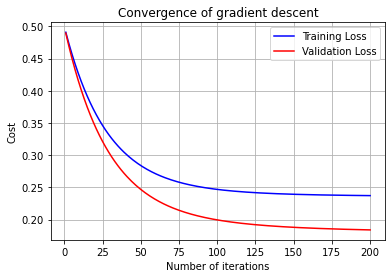

In [28]:
plt.plot(range(1, model3_stand_iterations + 1), model3_stand_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model3_stand_iterations + 1), model3_stand_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

## Question 2b
For question 2b the same model as 1b will be used. However, this time input normalization and standarization will be applied seperatly to the input datasets. Both the training and testing sets will receive the same input normalization and standardization.

To start with the dataset used for question 1b is copied into 2 matrices. One that will be normalized and one that will be standardized.

Note: The matrix being copied contains all X values as well as Y in one variable.

In [29]:
model4_vars = model2_vars

model4_stand_train = model2_train
print(model4_stand_train[:5])
model4_norm_train = model2_train

model4_stand_test = model2_test
model4_norm_test = model2_test

model4_trainLength = len(model4_stand_train)
print(model4_trainLength)
model4_testLength = len(model4_stand_test)
print(model4_testLength)

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
454  3143000  4500         3          1        2         1          0   
392  3500000  3990         3          1        2         1          0   
231  4690000  4320         3          1        1         1          0   
271  4340000  1905         5          1        2         0          0   
250  4515000  3510         3          1        3         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  
454         0                0                1        0         0  
392         0                0                0        0         0  
231         0                0                0        0         1  
271         1                0                0        0         0  
250         0                0                0        0         0  
381
164


### Normalization
The data was first normalized using MinMax Normalization. Using this technique the data is scaled so all values fall within 0 and 1. This is done in exactly the same way as in Question 2a.

In [30]:
scaler = MinMaxScaler()
model4_norm_train[model4_vars] = scaler.fit_transform(model4_norm_train[model4_vars])
print(model4_norm_train.head(10))

model4_norm_test[model4_vars] = scaler.fit_transform(model4_norm_test[model4_vars])
print(model4_norm_test.head(10))

        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
454  0.120606  0.193548      0.50        0.0  0.333333       1.0        0.0   
392  0.151515  0.156495      0.50        0.0  0.333333       1.0        0.0   
231  0.254545  0.180471      0.50        0.0  0.000000       1.0        0.0   
271  0.224242  0.005013      1.00        0.0  0.333333       0.0        0.0   
250  0.239394  0.121622      0.50        0.0  0.666667       1.0        0.0   
541  0.001485  0.040976      0.50        0.0  0.000000       0.0        0.0   
461  0.115152  0.226969      0.25        0.0  0.000000       1.0        0.0   
124  0.363636  0.340671      0.50        0.5  1.000000       1.0        0.0   
154  0.327273  0.131793      0.50        0.5  0.333333       1.0        0.0   
451  0.121212  0.357018      0.25        0.0  0.000000       1.0        0.0   

     basement  hotwaterheating  airconditioning   parking  prefarea  
454       0.0              0.0              1.0  0.000000   

In [31]:
model4_norm_Y_train = model4_norm_train.values[:, 0] #price

model4_norm_X0_train = np.ones((model4_trainLength, 1))
model4_norm_X1_train = model4_norm_train.values[:, 1] #area
model4_norm_X2_train = model4_norm_train.values[:, 2] #bedrooms
model4_norm_X3_train = model4_norm_train.values[:, 3] #bathrooms
model4_norm_X4_train = model4_norm_train.values[:, 4] #stories
model4_norm_X5_train = model4_norm_train.values[:, 5] #mainroad
model4_norm_X6_train = model4_norm_train.values[:, 6] #guestroom
model4_norm_X7_train = model4_norm_train.values[:, 7] #basement
model4_norm_X8_train = model4_norm_train.values[:, 8] #hotwaterheating
model4_norm_X9_train = model4_norm_train.values[:, 9] #airconditioning
model4_norm_X10_train = model4_norm_train.values[:, 10] #parking
model4_norm_X11_train = model4_norm_train.values[:, 11] #prefarea

model4_norm_Y_test = model4_norm_test.values[:, 5] #price


model4_norm_X0_test = np.ones((model4_testLength, 1))
model4_norm_X1_test = model4_norm_test.values[:, 1] #area
model4_norm_X2_test = model4_norm_test.values[:, 2] #bedrooms
model4_norm_X3_test = model4_norm_test.values[:, 3] #bathrooms
model4_norm_X4_test = model4_norm_test.values[:, 4] #stories
model4_norm_X5_test = model4_norm_test.values[:, 5] #mainroad
model4_norm_X6_test = model4_norm_test.values[:, 6] #guestroom
model4_norm_X7_test = model4_norm_test.values[:, 7] #basement
model4_norm_X8_test = model4_norm_test.values[:, 8] #hotwaterheating
model4_norm_X9_test = model4_norm_test.values[:, 9] #airconditioning
model4_norm_X10_test = model4_norm_test.values[:, 10] #parking
model4_norm_X11_test = model4_norm_test.values[:, 11] #prefarea

In [32]:
model4_norm_X1_train_1 = model4_norm_X1_train.reshape((model4_trainLength, 1))
model4_norm_X2_train_1 = model4_norm_X2_train.reshape((model4_trainLength, 1))
model4_norm_X3_train_1 = model4_norm_X3_train.reshape((model4_trainLength, 1))
model4_norm_X4_train_1 = model4_norm_X4_train.reshape((model4_trainLength, 1))
model4_norm_X5_train_1 = model4_norm_X5_train.reshape((model4_trainLength, 1))
model4_norm_X6_train_1 = model4_norm_X6_train.reshape((model4_trainLength, 1))
model4_norm_X7_train_1 = model4_norm_X7_train.reshape((model4_trainLength, 1))
model4_norm_X8_train_1 = model4_norm_X8_train.reshape((model4_trainLength, 1))
model4_norm_X9_train_1 = model4_norm_X9_train.reshape((model4_trainLength, 1))
model4_norm_X10_train_1 = model4_norm_X10_train.reshape((model4_trainLength, 1))
model4_norm_X11_train_1 = model4_norm_X11_train.reshape((model4_trainLength, 1))

model4_norm_X1_test_1 = model4_norm_X1_test.reshape((model4_testLength, 1))
model4_norm_X2_test_1 = model4_norm_X2_test.reshape((model4_testLength, 1))
model4_norm_X3_test_1 = model4_norm_X3_test.reshape((model4_testLength, 1))
model4_norm_X4_test_1 = model4_norm_X4_test.reshape((model4_testLength, 1))
model4_norm_X5_test_1 = model4_norm_X5_test.reshape((model4_testLength, 1))
model4_norm_X6_test_1 = model4_norm_X6_test.reshape((model4_testLength, 1))
model4_norm_X7_test_1 = model4_norm_X7_test.reshape((model4_testLength, 1))
model4_norm_X8_test_1 = model4_norm_X8_test.reshape((model4_testLength, 1))
model4_norm_X9_test_1 = model4_norm_X9_test.reshape((model4_testLength, 1))
model4_norm_X10_test_1 = model4_norm_X10_test.reshape((model4_testLength, 1))
model4_norm_X11_test_1 = model4_norm_X11_test.reshape((model4_testLength, 1))

model4_norm_X_train = np.hstack((model4_norm_X0_train, model4_norm_X1_train_1, model4_norm_X2_train_1, model4_norm_X3_train_1, model4_norm_X4_train_1, model4_norm_X5_train_1, model4_norm_X6_train_1, model4_norm_X7_train_1, model4_norm_X8_train_1, model4_norm_X9_train_1, model4_norm_X10_train_1, model4_norm_X11_train_1))
model4_norm_X_test = np.hstack((model4_norm_X0_test, model4_norm_X1_test_1, model4_norm_X2_test_1, model4_norm_X3_test_1, model4_norm_X4_test_1, model4_norm_X5_test_1, model4_norm_X6_test_1, model4_norm_X7_test_1, model4_norm_X8_test_1, model4_norm_X9_test_1, model4_norm_X10_test_1, model4_norm_X11_test_1))

print(model4_norm_X_train[:5])
print(model4_norm_X_test[:5])

[[1.         0.19354839 0.5        0.         0.33333333 1.
  0.         0.         0.         1.         0.         0.        ]
 [1.         0.1564952  0.5        0.         0.33333333 1.
  0.         0.         0.         0.         0.         0.        ]
 [1.         0.18047079 0.5        0.         0.         1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.00501308 1.         0.         0.33333333 0.
  0.         1.         0.         0.         0.         0.        ]
 [1.         0.12162162 0.5        0.         0.66666667 1.
  0.         0.         0.         0.         0.         0.        ]]
[[1.         0.16151203 0.4        0.         0.33333333 1.
  0.         0.         0.         0.         0.33333333 0.        ]
 [1.         0.54776632 0.4        0.         0.         1.
  0.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.12439863 0.6        0.         0.33333333 1.
  0.         0.         0.         1

In [33]:
model4_norm_theta = np.zeros(12)
model4_norm_alpha = 0.03
model4_norm_iterations = 120

model4_norm_initial_training_cost = compute_cost(model4_norm_X_train, model4_norm_Y_train, model4_norm_theta)
print(model4_norm_initial_training_cost)

model4_norm_theta, model4_norm_cost_history, model4_norm_testLoss_history = gradient_descent(model4_norm_X_train, model4_norm_Y_train, model4_norm_X_test, model4_norm_Y_test, model4_norm_theta, model4_norm_alpha, model4_norm_iterations)
print(model4_norm_cost_history[:5])
model4_norm_final_training_cost = compute_cost(model4_norm_X_train, model4_norm_Y_train, model4_norm_theta)
print('Model 2 Final Training Set Cost: ', model4_norm_final_training_cost)

0.04726753099662817
[0.04134195 0.03631037 0.03203739 0.02840811 0.02532503]
Model 2 Final Training Set Cost:  0.006405123940970754


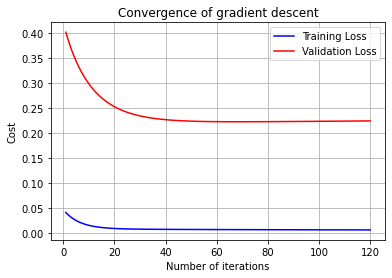

In [34]:
plt.plot(range(1, model4_norm_iterations + 1), model4_norm_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model4_norm_iterations + 1), model4_norm_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

### Standardization
The data was then Standardized. The goal with standardization is to scale the data to achieve a mean of zero

In [35]:
scaler = StandardScaler()
model4_stand_train[model4_vars] = scaler.fit_transform(model4_stand_train[model4_vars])
print(model4_stand_train.head(10))

model4_stand_test[model4_vars] = scaler.fit_transform(model4_stand_test[model4_vars])
print(model4_stand_test.head(10))

        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
454 -0.868394 -0.286366  0.073764  -0.581230  0.207401  0.393123  -0.457738   
392 -0.677628 -0.544762  0.073764  -0.581230  0.207401  0.393123  -0.457738   
231 -0.041744 -0.377564  0.073764  -0.581230 -0.937813  0.393123  -0.457738   
271 -0.228768 -1.601145  2.884176  -0.581230  0.207401 -2.543735  -0.457738   
250 -0.135256 -0.787958  0.073764  -0.581230  1.352614  0.393123  -0.457738   
541 -1.603589 -1.350349  0.073764  -0.581230 -0.937813 -2.543735  -0.457738   
461 -0.902058 -0.053303 -1.331442  -0.581230 -0.937813  0.393123  -0.457738   
124  0.631546  0.739618  0.073764   1.488383  2.497828  0.393123  -0.457738   
154  0.407116 -0.717026  0.073764   1.488383  0.207401  0.393123  -0.457738   
451 -0.864653  0.853616 -1.331442  -0.581230 -0.937813  0.393123  -0.457738   

     basement  hotwaterheating  airconditioning   parking  prefarea  
454 -0.711287        -0.216109         1.422607 -0.822960 -0

In [36]:
model4_stand_Y_train = model4_stand_train.values[:, 0] #price

model4_stand_X0_train = np.ones((model4_trainLength, 1))
model4_stand_X1_train = model4_stand_train.values[:, 1] #area
model4_stand_X2_train = model4_stand_train.values[:, 2] #bedrooms
model4_stand_X3_train = model4_stand_train.values[:, 3] #bathrooms
model4_stand_X4_train = model4_stand_train.values[:, 4] #stories
model4_stand_X5_train = model4_stand_train.values[:, 5] #mainroad
model4_stand_X6_train = model4_stand_train.values[:, 6] #guestroom
model4_stand_X7_train = model4_stand_train.values[:, 7] #basement
model4_stand_X8_train = model4_stand_train.values[:, 8] #hotwaterheating
model4_stand_X9_train = model4_stand_train.values[:, 9] #airconditioning
model4_stand_X10_train = model4_stand_train.values[:, 10] #parking
model4_stand_X11_train = model4_stand_train.values[:, 11] #prefarea

model4_stand_Y_test = model4_stand_test.values[:, 5] #price


model4_stand_X0_test = np.ones((model4_testLength, 1))
model4_stand_X1_test = model4_stand_test.values[:, 1] #area
model4_stand_X2_test = model4_stand_test.values[:, 2] #bedrooms
model4_stand_X3_test = model4_stand_test.values[:, 3] #bathrooms
model4_stand_X4_test = model4_stand_test.values[:, 4] #stories
model4_stand_X5_test = model4_stand_test.values[:, 5] #mainroad
model4_stand_X6_test = model4_stand_test.values[:, 6] #guestroom
model4_stand_X7_test = model4_stand_test.values[:, 7] #basement
model4_stand_X8_test = model4_stand_test.values[:, 8] #hotwaterheating
model4_stand_X9_test = model4_stand_test.values[:, 9] #airconditioning
model4_stand_X10_test = model4_stand_test.values[:, 10] #parking
model4_stand_X11_test = model4_stand_test.values[:, 11] #prefarea




model4_stand_X1_train_1 = model4_stand_X1_train.reshape((model4_trainLength, 1))
model4_stand_X2_train_1 = model4_stand_X2_train.reshape((model4_trainLength, 1))
model4_stand_X3_train_1 = model4_stand_X3_train.reshape((model4_trainLength, 1))
model4_stand_X4_train_1 = model4_stand_X4_train.reshape((model4_trainLength, 1))
model4_stand_X5_train_1 = model4_stand_X5_train.reshape((model4_trainLength, 1))
model4_stand_X6_train_1 = model4_stand_X6_train.reshape((model4_trainLength, 1))
model4_stand_X7_train_1 = model4_stand_X7_train.reshape((model4_trainLength, 1))
model4_stand_X8_train_1 = model4_stand_X8_train.reshape((model4_trainLength, 1))
model4_stand_X9_train_1 = model4_stand_X9_train.reshape((model4_trainLength, 1))
model4_stand_X10_train_1 = model4_stand_X10_train.reshape((model4_trainLength, 1))
model4_stand_X11_train_1 = model4_stand_X11_train.reshape((model4_trainLength, 1))

model4_stand_X1_test_1 = model4_stand_X1_test.reshape((model4_testLength, 1))
model4_stand_X2_test_1 = model4_stand_X2_test.reshape((model4_testLength, 1))
model4_stand_X3_test_1 = model4_stand_X3_test.reshape((model4_testLength, 1))
model4_stand_X4_test_1 = model4_stand_X4_test.reshape((model4_testLength, 1))
model4_stand_X5_test_1 = model4_stand_X5_test.reshape((model4_testLength, 1))
model4_stand_X6_test_1 = model4_stand_X6_test.reshape((model4_testLength, 1))
model4_stand_X7_test_1 = model4_stand_X7_test.reshape((model4_testLength, 1))
model4_stand_X8_test_1 = model4_stand_X8_test.reshape((model4_testLength, 1))
model4_stand_X9_test_1 = model4_stand_X9_test.reshape((model4_testLength, 1))
model4_stand_X10_test_1 = model4_stand_X10_test.reshape((model4_testLength, 1))
model4_stand_X11_test_1 = model4_stand_X11_test.reshape((model4_testLength, 1))

model4_stand_X_train = np.hstack((model4_stand_X0_train, model4_stand_X1_train_1, model4_stand_X2_train_1, model4_stand_X3_train_1, model4_stand_X4_train_1, model4_stand_X5_train_1, model4_stand_X6_train_1, model4_stand_X7_train_1, model4_stand_X8_train_1, model4_stand_X9_train_1, model4_stand_X10_train_1, model4_stand_X11_train_1))
model4_stand_X_test = np.hstack((model4_stand_X0_test, model4_stand_X1_test_1, model4_stand_X2_test_1, model4_stand_X3_test_1, model4_stand_X4_test_1, model4_stand_X5_test_1, model4_stand_X6_test_1, model4_stand_X7_test_1, model4_stand_X8_test_1, model4_stand_X9_test_1, model4_stand_X10_test_1, model4_stand_X11_test_1))

print(model4_stand_X_train[:5])
print(model4_stand_X_test[:5])

[[ 1.         -0.28636589  0.07376409 -0.58122996  0.20740088  0.3931227
  -0.45773771 -0.71128676 -0.21610946  1.42260659 -0.82296013 -0.56421547]
 [ 1.         -0.54476182  0.07376409 -0.58122996  0.20740088  0.3931227
  -0.45773771 -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547]
 [ 1.         -0.37756445  0.07376409 -0.58122996 -0.93781267  0.3931227
  -0.45773771 -0.71128676 -0.21610946 -0.70293502 -0.82296013  1.77237252]
 [ 1.         -1.60114518  2.88417578 -0.58122996  0.20740088 -2.5437351
  -0.45773771  1.40590273 -0.21610946 -0.70293502 -0.82296013 -0.56421547]
 [ 1.         -0.78795799  0.07376409 -0.58122996  1.35261443  0.3931227
  -0.45773771 -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547]]
[[ 1.         -0.52840866 -0.00769436 -0.55021459  0.26524149  0.43405737
  -0.4827864  -0.78978629 -0.22645541 -0.62436408  0.44261462 -0.53033009]
 [ 1.          1.67330604 -0.00769436 -0.55021459 -0.91042351  0.43405737
  -0.4827864   1.26616531 -0.2264554

In [37]:
model4_stand_theta = np.zeros(12)
model4_stand_alpha = 0.03
model4_stand_iterations = 200

model4_stand_initial_training_cost = compute_cost(model4_stand_X_train, model4_stand_Y_train, model4_stand_theta)
print(model4_stand_initial_training_cost)

model4_stand_theta, model4_stand_cost_history, model4_stand_testLoss_history = gradient_descent(model4_stand_X_train, model4_stand_Y_train, model4_stand_X_test, model4_stand_Y_test, model4_stand_theta, model4_stand_alpha, model4_stand_iterations)
print(model4_stand_cost_history[:5])
model4_stand_final_training_cost = compute_cost(model4_stand_X_train, model4_stand_Y_train, model4_stand_theta)
print('Model 1 Final Training Set Cost: ', model4_stand_final_training_cost)
print('Final Theta: ', model4_stand_theta)

0.5
[0.45755647 0.42080677 0.38898085 0.36141309 0.33752811]
Model 1 Final Training Set Cost:  0.17511921020127166
Final Theta:  [1.37387914e-16 2.66846116e-01 6.35693079e-02 2.47022045e-01
 1.95994266e-01 9.33406551e-02 8.48051681e-02 9.10985779e-02
 1.38523764e-01 2.32094167e-01 1.17845119e-01 1.63411355e-01]


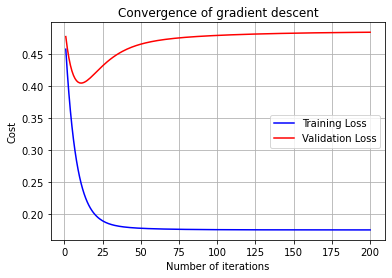

In [38]:
plt.plot(range(1, model4_stand_iterations + 1), model4_stand_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model4_stand_iterations + 1), model4_stand_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

## Question 3a
For question 3a the same datasets used in Question 2a will be used. As with question 2 both the standardized and normalized sets will be run seperatly. The difference with Question 3 is that Parameter Penalties regularization will be added to the gradient descent logic. This will be done by changing the loss function and adding the parameter penalties.

The first thing is to create a new loss function which adds the parameter penalties. It is important that X0 is not penalized which is why it is calculated seperatly. 

In [39]:
def gradient_descent_regularized(training_XVals, training_YVals, testing_XVals, testing_YVals, theta, alpha, lam, iterations):
    numSamples = len(training_XVals)
    training_loss_history = np.zeros(iterations) #stores the calculated cost for each iteration of the algorithm
    testing_loss_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = training_XVals.dot(theta) #tests the current theta value with each independent variable value
        errors = np.subtract(predictions, training_YVals)
        
        sum_delta = (alpha/numSamples) * (training_XVals.transpose().dot(errors));
        theta[0] = theta[0] - sum_delta[0] #updating the value of theta based on the new data
        
        theta[1:] = (1 - alpha*(lam / numSamples))*theta[1:] - sum_delta[1:]
        
        training_loss_history[i] = compute_cost(training_XVals, training_YVals, theta) #logging the training cost to the cost history log
        testing_loss_history[i] = compute_cost(testing_XVals, testing_YVals, theta)
    return theta, training_loss_history, testing_loss_history

### Normalization
The normalized dataset from Question 2a is then copied

In [40]:
model5_norm_X_train = model3_norm_X_train
model5_norm_X_test = model3_norm_X_test
model5_norm_Y_train = model3_norm_Y_train
model5_norm_Y_test = model3_norm_Y_test

In [41]:
model5_norm_theta = np.zeros(6)
model5_norm_alpha = 0.05
model5_norm_iterations = 1000
model5_lam = 0.01

model5_norm_initial_training_cost = compute_cost(model5_norm_X_train, model5_norm_Y_train, model5_norm_theta)
print(model5_norm_initial_training_cost)

model5_norm_theta, model5_norm_cost_history, model5_norm_testLoss_history = gradient_descent_regularized(model5_norm_X_train, model5_norm_Y_train, model5_norm_X_test, model5_norm_Y_test, model5_norm_theta, model5_norm_alpha, model5_lam, model5_norm_iterations)
print(model5_norm_cost_history[:5])
model5_norm_final_training_cost = compute_cost(model5_norm_X_train, model5_norm_Y_train, model5_norm_theta)
print('Model 1 Final Training Set Cost: ', model5_norm_final_training_cost)
print('Final Theta = ', model5_norm_theta)

0.5
[0.49761225 0.49531972 0.49311094 0.49097602 0.48890647]
Model 1 Final Training Set Cost:  0.24744735048806357
Final Theta =  [-1.15629506  1.55820524  0.40955265  1.24243502  0.8946345   0.7417923 ]


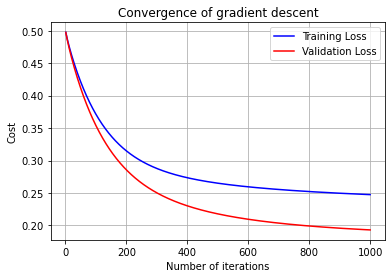

In [42]:
plt.plot(range(1, model5_norm_iterations + 1), model5_norm_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model5_norm_iterations + 1), model5_norm_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

### Standardized
The standardized dataset from Question 2b is then copied

In [43]:
model5_stand_X_train = model3_stand_X_train
model5_stand_X_test = model3_stand_X_test
model5_stand_Y_train = model3_stand_Y_train
model5_stand_Y_test = model3_stand_Y_test

In [44]:
model5_stand_theta = np.zeros(6)
model5_stand_alpha = 0.05
model5_stand_iterations = 120
model5_lam = 0.01

model5_stand_initial_training_cost = compute_cost(model5_stand_X_train, model5_stand_Y_train, model5_stand_theta)
print(model5_stand_initial_training_cost)

model5_stand_theta, model5_stand_cost_history, model5_stand_testLoss_history = gradient_descent_regularized(model5_stand_X_train, model5_stand_Y_train, model5_stand_X_test, model5_stand_Y_test, model5_stand_theta, model5_stand_alpha, model5_lam, model5_stand_iterations)
print(model5_stand_cost_history[:5])
model5_stand_final_training_cost = compute_cost(model5_stand_X_train, model5_stand_Y_train, model5_stand_theta)
print('Model 1 Final Training Set Cost: ', model5_stand_final_training_cost)
print('Final Theta = ', model5_stand_theta)

0.5
[0.4556547  0.41899208 0.38866242 0.36355466 0.34275408]
Model 1 Final Training Set Cost:  0.23576639581134798
Final Theta =  [7.94931342e-17 3.81454633e-01 1.07394037e-01 2.96404655e-01
 2.33469429e-01 1.51847491e-01]


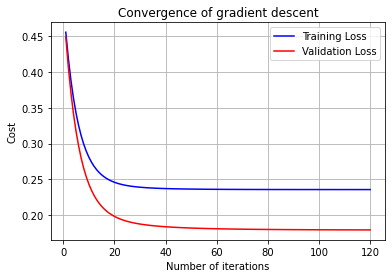

In [45]:
plt.plot(range(1, model5_stand_iterations + 1), model5_stand_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model5_stand_iterations + 1), model5_stand_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

## Question 3b

### Normalized

In [46]:
model6_norm_X_train = model4_norm_X_train
model6_norm_X_test = model4_norm_X_test
model6_norm_Y_train = model4_norm_Y_train
model6_norm_Y_test = model4_norm_Y_test

In [47]:
model6_norm_theta = np.zeros(12)
model6_norm_alpha = 0.01
model6_norm_iterations = 500
model5_lam = 0.1

model6_norm_initial_training_cost = compute_cost(model6_norm_X_train, model6_norm_Y_train, model6_norm_theta)
print(model6_norm_initial_training_cost)

model6_norm_theta, model6_norm_cost_history, model6_norm_testLoss_history = gradient_descent_regularized(model6_norm_X_train, model6_norm_Y_train, model6_norm_X_test, model6_norm_Y_test, model6_norm_theta, model6_norm_alpha, model5_lam, model6_norm_iterations)
print(model6_norm_cost_history[:5])
model6_norm_final_training_cost = compute_cost(model6_norm_X_train, model6_norm_Y_train, model6_norm_theta)
print('Model 1 Final Training Set Cost: ', model6_norm_final_training_cost)
print('Final Theta = ', model6_norm_theta)

0.5
[0.49855872 0.49715074 0.49577449 0.49442846 0.49311125]
Model 1 Final Training Set Cost:  0.28184122013125934
Final Theta =  [-0.47203706  0.17691789  0.01806798  0.37395394  0.3029176  -0.03051697
  0.22423356  0.12137438  0.12065172  0.44750775  0.27569434  0.3706948 ]


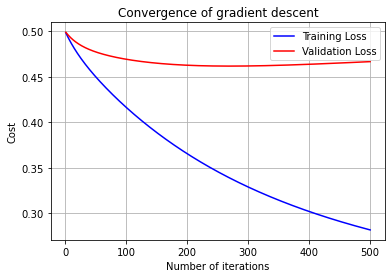

In [48]:
plt.plot(range(1, model6_norm_iterations + 1), model6_norm_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model6_norm_iterations + 1), model6_norm_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

### Standardized

In [49]:
model6_stand_X_train = model4_stand_X_train
print(model6_stand_X_train.shape)
model6_stand_X_test = model4_stand_X_test
model6_stand_Y_train = model4_stand_Y_train
model6_stand_Y_test = model4_stand_Y_test

(381, 12)


In [50]:
model6_stand_theta = np.zeros(12)
model6_stand_alpha = 0.01
model6_stand_iterations = 500
model5_lam = 0.1

model6_stand_initial_training_cost = compute_cost(model6_stand_X_train, model6_stand_Y_train, model6_stand_theta)
print(model6_stand_initial_training_cost)

model6_stand_theta, model6_stand_cost_history, model6_stand_testLoss_history = gradient_descent_regularized(model6_stand_X_train, model6_stand_Y_train, model6_stand_X_test, model6_stand_Y_test, model6_stand_theta, model6_stand_alpha, model5_lam, model6_stand_iterations)
print(model6_stand_cost_history[:5])
model6_stand_final_training_cost = compute_cost(model6_stand_X_train, model6_stand_Y_train, model6_stand_theta)
print('Model 1 Final Training Set Cost: ', model6_stand_final_training_cost)
print('Final Theta = ', model6_stand_theta)

0.5
[0.48551244 0.47168857 0.45849774 0.44591071 0.43389961]
Model 1 Final Training Set Cost:  0.17514858650063017
Final Theta =  [1.37213076e-16 2.65116210e-01 6.70472869e-02 2.45794313e-01
 1.94389271e-01 9.41943521e-02 8.60324133e-02 8.96516605e-02
 1.36791688e-01 2.31001742e-01 1.19331952e-01 1.63412515e-01]


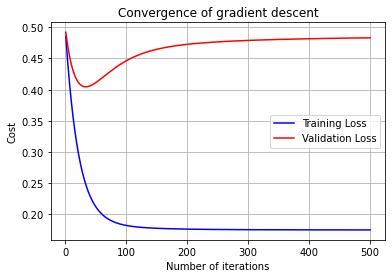

In [51]:
plt.plot(range(1, model6_stand_iterations + 1), model6_stand_cost_history, color = 'blue', label = 'Training Loss')
plt.plot(range(1, model6_stand_iterations + 1), model6_stand_testLoss_history, color = 'red', label = 'Validation Loss')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")
plt.legend()

In [ ]:
guess = model5_norm_theta.dot([1, 0.05656357, 0.6, 0.83333333  0.33333333  0.66666667])